In [59]:
import math
import pandas as pd

from sklearn import metrics, preprocessing, cluster

from scipy.spatial import distance
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
# Read file
icfes = pd.read_csv("./data/ICFES/icfes_preprocessing.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)

icfes.describe()

(554679, 68)


,DESEMP_C_NATURALES,DESEMP_LECTURA_CRITICA,DESEMP_MATEMATICAS,DESEMP_SOCIALES_CIUDADANAS,ESTU_INSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_C_NATURALES,PERCENTIL_GLOBAL,PERCENTIL_INGLES,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
count,554679.000000,554679.000000,554679.000000,554679.000000,551893.000000,553993.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000,554679.000000
mean,2.231510,2.695186,2.424215,2.172224,50.639441,2.365806,50.652603,50.498465,50.648169,50.574576,50.599347,50.603268,20171.976785,51.532825,256.819117,50.032262,53.434341,50.394147,50.537165
std,0.736064,0.712229,0.763448,0.793816,9.308649,0.719504,28.838822,28.858438,28.829744,28.876041,28.862893,28.846366,0.150587,10.186885,49.282731,11.984361,9.876249,12.143610,11.254386
min,1.000000,1.000000,1.000000,1.000000,14.413616,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,44.156093,2.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,20172.000000,44.000000,219.000000,41.000000,46.000000,41.000000,42.000000
50%,2.000000,3.000000,2.000000,2.000000,50.067828,2.000000,51.000000,50.000000,51.000000,51.000000,51.000000,51.000000,20172.000000,51.000000,254.000000,48.000000,53.000000,50.000000,50.000000
75%,3.000000,3.000000,3.000000,3.000000,56.237077,3.000000,76.000000,75.000000,76.000000,76.000000,76.000000,76.000000,20172.000000,59.000000,291.000000,57.000000,60.000000,59.000000,58.000000
max,4.000000,4.000000,4.000000,4.000000,84.394966,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,20172.000000,100.000000,476.000000,100.000000,100.000000,100.000000,100.000000


In [3]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

columns = ['COLE_AREA_UBICACION', 'COLE_BILINGUE']

columns = [
    'FAMI_COMECARNEPESCADOHUEVO', 
    'FAMI_COMECEREALFRUTOSLEGUMBRE', 
    'FAMI_COMELECHEDERIVADOS', 
    'FAMI_CUARTOSHOGAR', 
    'FAMI_EDUCACIONMADRE', 
    'FAMI_EDUCACIONPADRE', 
    'FAMI_ESTRATOVIVIENDA', 
    'FAMI_NUMLIBROS', 
    'FAMI_PERSONASHOGAR', 
    'FAMI_SITUACIONECONOMICA', 
    'FAMI_TIENEAUTOMOVIL', 
    'FAMI_TIENECOMPUTADOR', 
    'FAMI_TIENECONSOLAVIDEOJUEGOS', 
    'FAMI_TIENEHORNOMICROOGAS', 
    'FAMI_TIENELAVADORA', 
    'FAMI_TIENEMOTOCICLETA', 
    'FAMI_TIENESERVICIOTV', 
    'FAMI_TRABAJOLABORMADRE', 
    'FAMI_TRABAJOLABORPADRE',
    'DESEMP_INGLES', 
    #'DESEMP_C_NATURALES', 
    #'DESEMP_INGLES', 
    #'DESEMP_LECTURA_CRITICA', 
    #'DESEMP_MATEMATICAS',
    #'DESEMP_SOCIALES_CIUDADANAS'
]



rows = math.ceil(icfes.shape[0]*0.02)

X = icfes[columns].values[:rows, :]

print(X.shape)

km = KModes(n_clusters=2, init='Cao', verbose=2)
cluster_labels = km.fit_predict(X)

# Print cluster centroids of the trained model.
print("centroids", km.cluster_centroids_)

print("cluster_labels", cluster_labels.shape)

(11094, 20)
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1364, cost: 85234.0
Run 1, iteration: 2/100, moves: 752, cost: 84919.0
Run 1, iteration: 3/100, moves: 43, cost: 84919.0
centroids [['Todos o casi todos los dias' 'Todos o casi todos los días'
  'Todos o casi todos los días' 'Tres' 'Educación profesional completa'
  'Educación profesional completa' 'Estrato 6' '26 A 100 LIBROS' '3 a 4'
  'Igual' 'Si' 'Si' 'SI' 'SI' 'SI' 'NO' 'SI'
  'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)'
  'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)'
  'B+']
 ['Todos o casi todos los dias' '3 a 5 veces por semana'
  '3 a 5 veces por semana' 'Dos' 'Secundaria (Bachillerato) completa'
  'Secundaria (Bachillerato) completa' 'Estrato 3' '11 A 25 LIBROS'
  '3 a 4' 'Igual' 'No' 'Si' 'NO' 'SI' 'SI' 'SI' 'SI'
  'Trabaja en el hogar, no trabaja o estudia'
  'Es dueño de un negocio pequeño (tiene pocos empl

In [4]:
from sklearn_pandas import DataFrameMapper, cross_val_score

mapper_df = DataFrameMapper([
    (['FAMI_COMECARNEPESCADOHUEVO','FAMI_COMECEREALFRUTOSLEGUMBRE'], preprocessing.LabelBinarizer())], df_out=True)

dummies = pd.get_dummies(icfes[columns])

X = dummies.values[:rows, :]

In [7]:
import time

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def gower_distance(x, y):
    '''d = 0
    for i in range(len(x)):
        if is_number(x[i]):
            d += distance.euclidean(x[i], y[i])
        else:
            d += distance.hamming(x[i], y[i])
    
    d = d / len(x)'''
    
    return distance.hamming(x, y)

def gower_distance_matrix(X):
    m = X.shape[0]
    
    # Calc one part of the matrix
    result = [[gower_distance(X[i], X[j]) if i < j else 0 for i in range(m)] for j in range(m)]
    
    # Copy the values from the other part
    result = [[result[i][j] if i > j else result[j][i] for i in range(m)] for j in range(m)]
        
    return np.asarray(result)

def gower_distance_matrix3(X):
    m = X.shape[0]
    
    result = np.zeros((m, m))
    
    # Calc one part of the matrix
    result = [[gower_distance(X[i], X[j]) if i < j else 0 for i in range(m)] for j in range(m)]
    
    # Copy the values from the other part
    result = [[result[i][j] if i > j else result[j][i] for i in range(m)] for j in range(m)]
        
    return np.asarray(result)

def gower_distance_matrix2(X):
    return metrics.pairwise.pairwise_distances(X, X, metric='hamming', n_jobs=-1)

start_time = time.time()

#distance_matrix = gower_distance_matrix2(X)



silhouette_sk = metrics.silhouette_score(X, labels=cluster_labels, metric='hamming', n_jobs=-1)

print("--- {0} seconds ---".format(time.time() - start_time))

print(silhouette_sk)

#distance_matrix

--- 7.043285369873047 seconds ---
0.20766525744215758


# K-modes

In [38]:
def plot_silhouette(X, n_clusters, attribute_names):
    # Initialize the clusterer with n_clusters value and a random generator seed.
    clusterer =  KModes(n_clusters=n_clusters, init='Cao')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels, metric='hamming', n_jobs=-1)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels, metric='hamming', n_jobs=-1)
    
    # Create a subplot with 1 row and 1 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(16, 9)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Set1(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        label_idx = np.array(clusterer.cluster_centroids_[i], dtype=bool)
        label_atributes = np.array(attribute_names)
        label = label_atributes[label_idx]
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KModes clustering "
                      "with {0} clusters".format(n_clusters)),fontsize=14, fontweight='bold')
    
    plt.show()
    
    
def plot_silhouette_score(X, range_n_clusters, attribute_names):
    
    C = len(range_n_clusters)
    
    silhouette_avg = []
    clusterers = []
    
    for n_clusters in range_n_clusters:
        
        # Initialize the clusterer with n_clusters value.
        clusterer =  KModes(n_clusters=n_clusters, init='Cao')
        cluster_labels = clusterer.fit_predict(X)
        clusterers.append(clusterer)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        current_silhouette_avg = metrics.silhouette_score(X, cluster_labels, metric='hamming', n_jobs=-1)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", current_silhouette_avg)
        silhouette_avg.append(current_silhouette_avg)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(16, 9))
    ax1.plot(range_n_clusters, silhouette_avg)
    ax1.set_title("K-modes silhouette score on ICFES dataset")
    ax1.set_xlabel("Cluster size")
    ax1.set_ylabel("Silhouette score")
    
    plt.show()
    
    return clusterers, silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.23615167335683163
For n_clusters = 3 The average silhouette_score is : 0.23304515535442868
For n_clusters = 4 The average silhouette_score is : 0.1956744510014663
For n_clusters = 5 The average silhouette_score is : 0.16410608660750378


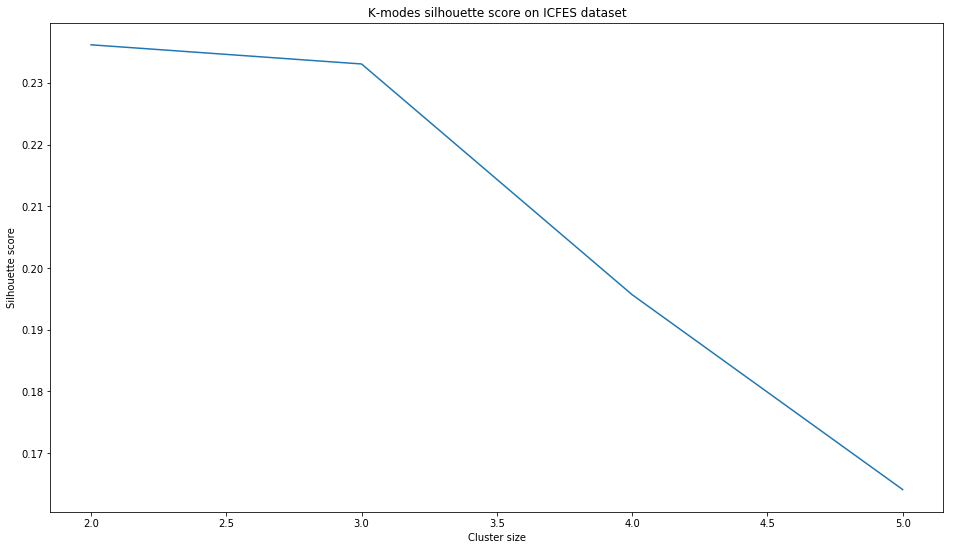

In [39]:
range_n_clusters = range(2, 6)

clusterers, silhouette_avg = plot_silhouette_score(X, range_n_clusters, dummies.columns)

[0.23615167335683163, 0.23304515535442868, 0.1956744510014663, 0.16410608660750378] 2
For n_clusters = 2 The average silhouette_score is : 0.23615167335683163


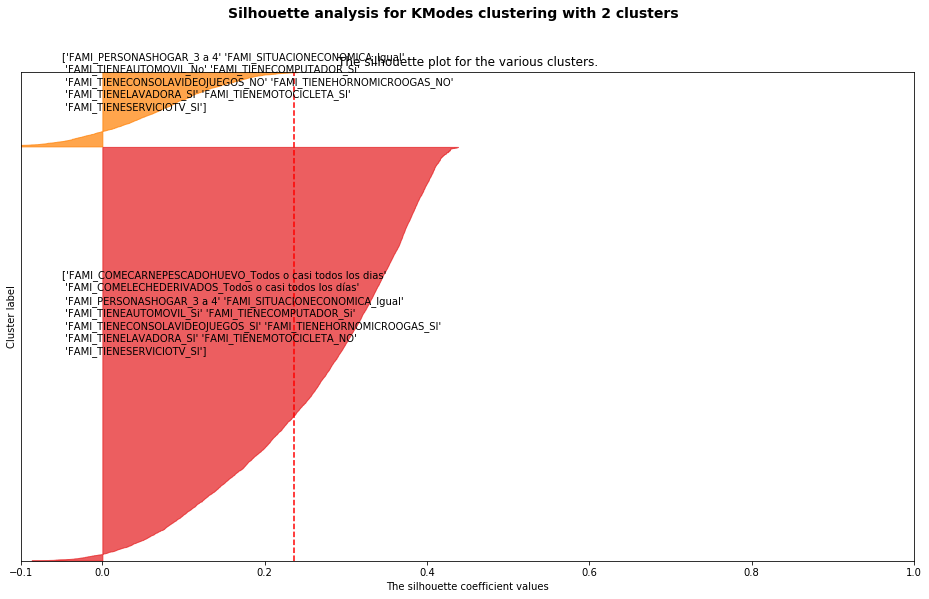

KModes(cat_dissim=<function matching_dissim at 0x7f1a4d6f6400>, init='Cao',
    max_iter=100, n_clusters=2, n_init=1, verbose=0)

In [44]:
print(silhouette_avg, range_n_clusters[np.argmax(silhouette_avg)])
plot_silhouette(X, range_n_clusters[np.argmax(silhouette_avg)], dummies.columns)

# Hierarchical

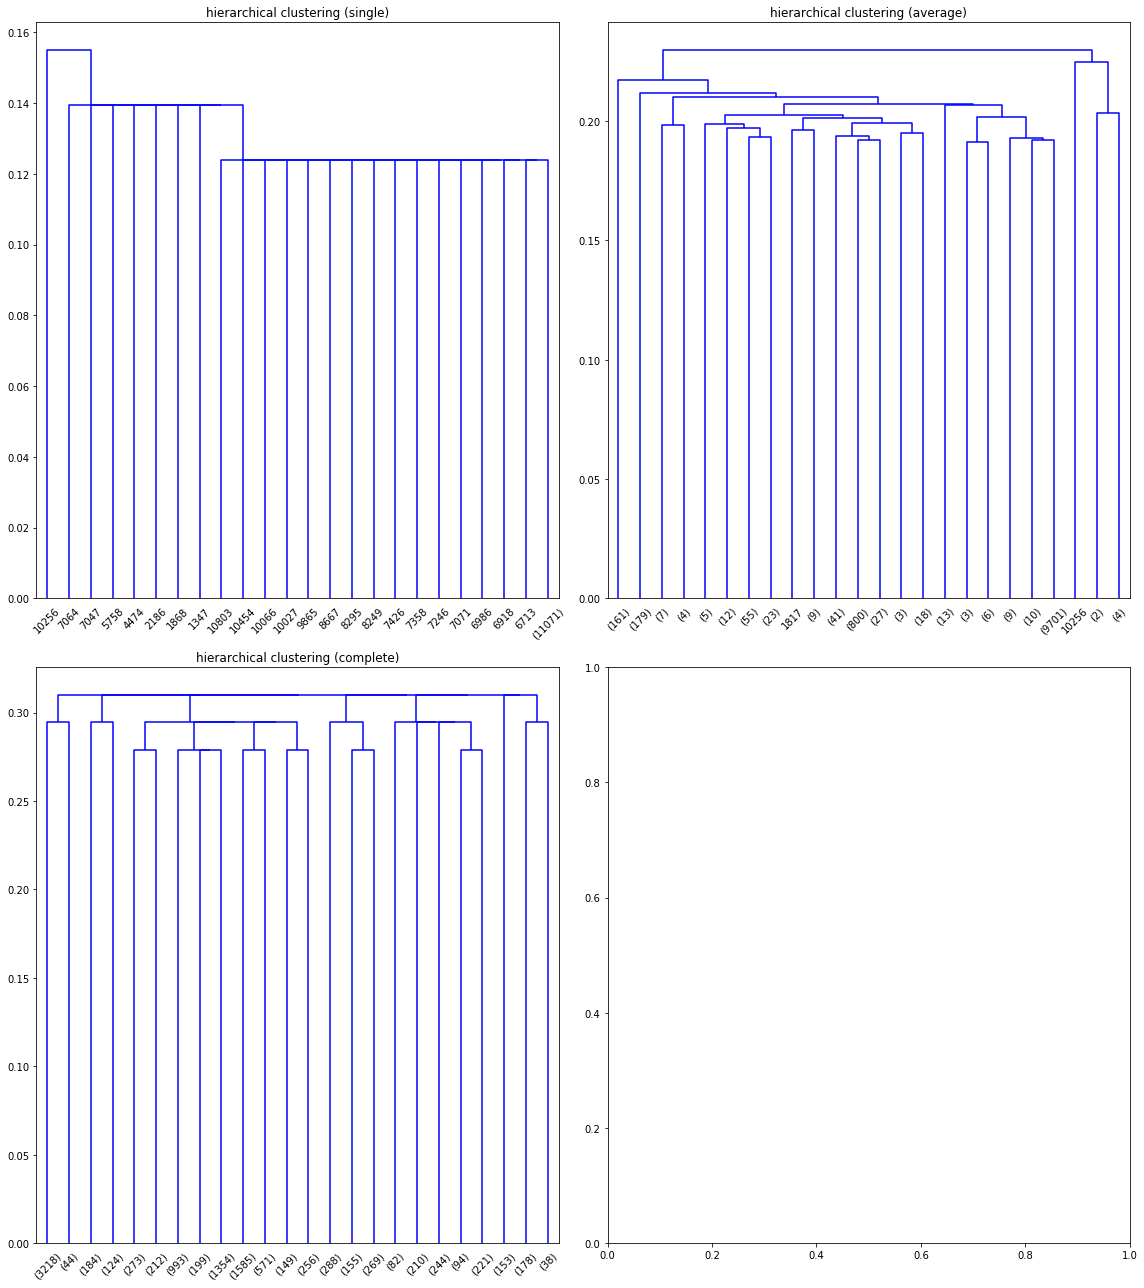

In [60]:
from scipy.cluster import hierarchy    

labels = dummies.columns

methods = {'single', 'complete', 'average'}

r, c = (2, 2)
fig, axes = plt.subplots(r, c, figsize=(16, 9*r))
plot_num = 1

for method in methods:
    # generate the linkage matrix
    Z = hierarchy.linkage(X, method=method, metric='hamming')
    
    # plot
    ax = plt.subplot(r, c, plot_num)
    dn = hierarchy.dendrogram(Z, p=24, truncate_mode='lastp')
    ax.set_title("hierarchical clustering ("+method+")")
    plot_num +=1

plt.tight_layout()
plt.show()

# DBSCAN

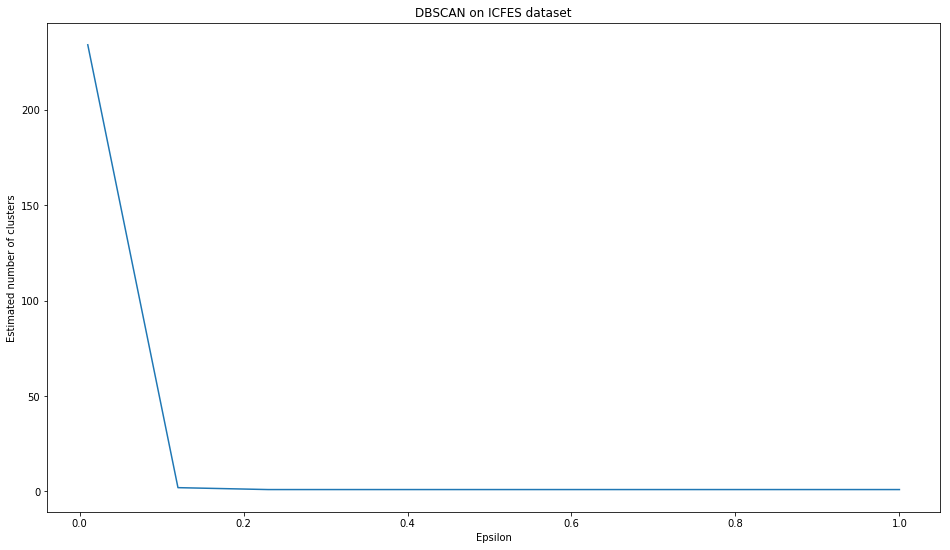

In [69]:
def plot_dbscan(X):

    epsilons = np.linspace(0.01, 1, num=10)
    n_clusters = []
    
    for eps in epsilons:
        db = cluster.DBSCAN(eps=eps, min_samples=2, metric='hamming', n_jobs=-1).fit(X)
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))

    # Plot result
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))

    ax.plot(epsilons, n_clusters)
    ax.set_title("DBSCAN on ICFES dataset")
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Estimated number of clusters")
    
    plt.show()
    
#############

plot_dbscan(X)

